# Title

## Download data

In [ ]:
import pandas as pd
import numpy as np
import xarray as xr
import hvplot.xarray
import cartopy
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (10,10)
import fsspec
import gdrivefs
from skimage import measure

In [ ]:
! pip install fsspec==0.8.4
! pip install 'git+git://github.com/tjcrone/gdrivefs.git@540a55fae06cbed4f7d9f8d540ac29fcb640c38a'

In [2]:
gdfid = '1hzH32KcsdMtNX0f9_WkMTCyf20tj6ZLk'
gdfs = gdrivefs.GoogleDriveFileSystem(root_file_id = gdfid, token = 'cache')

In [3]:
files = gdfs.ls('/')
files

['ICE.2000-2010.zarr',
 'ICE.2000.01-12.c41.nc',
 'ICE.2001.01-12.c42.nc',
 'ICE.2002.01-12.c43.nc',
 'ICE.2003.01-12.c44.nc',
 'ICE.2004.01-12.c45.nc',
 'ICE.2005.01-12.c46.nc',
 'ICE.2006.01-12.c47.nc',
 'ICE.2007.01-12.c48.nc',
 'ICE.2008.01-12.c49.nc',
 'ICE.2009.01-12.c50.nc',
 'ICE.2010.01-12.c51.nc']

In [4]:
ofs = []
for file in files[1:]: # only include NetCDF files in files
    ofs.append(gdfs.open(file))

ds = xr.open_mfdataset(ofs)
ds

<xarray.Dataset>
Dimensions:         (ATMLAY: 3, ATMLAY3_3: 1, OUTLAY: 18, OUTLAY1_1: 1, PLEV: 7, SECTOR: 2, SECTOR1_1: 1, TIME: 4018, X12_84: 73, Y21_155: 135, ZTQLEV: 4, ZUVLEV: 3, bnds: 2)
Coordinates:
  * SECTOR          (SECTOR) float32 1.0 2.0
  * ZTQLEV          (ZTQLEV) float32 2.0 10.0 50.0 100.0
  * SECTOR1_1       (SECTOR1_1) float32 1.0
  * ZUVLEV          (ZUVLEV) float32 10.0 50.0 100.0
  * Y21_155         (Y21_155) float32 -1180.0 -1160.0 -1140.0 ... 1480.0 1500.0
  * ATMLAY          (ATMLAY) float32 0.99899215 0.99937004 0.99974793
  * ATMLAY3_3       (ATMLAY3_3) float32 0.99974793
  * PLEV            (PLEV) float32 200.0 500.0 600.0 700.0 800.0 850.0 925.0
  * OUTLAY1_1       (OUTLAY1_1) float32 0.0
  * X12_84          (X12_84) float32 -760.0 -740.0 -720.0 ... 640.0 660.0 680.0
  * OUTLAY          (OUTLAY) float32 0.0 0.05 0.1 0.2 0.3 ... 7.5 10.0 15.0 20.0
  * TIME            (TIME) datetime64[ns] 2000-01-01T12:00:00 ... 2010-12-31T...
Dimensions without coordinates: bnds
Data variables:
    TIME_bnds       (TIME, bnds) datetime64[ns] dask.array<chunksize=(366, 2), meta=np.ndarray>
    DATE            (TIME) float32 dask.array<chunksize=(366,), meta=np.ndarray>
    YYYY            (TIME) float32 dask.array<chunksize=(366,), meta=np.ndarray>
    MM              (TIME) float32 dask.array<chunksize=(366,), meta=np.ndarray>
    DD              (TIME) float32 dask.array<chunksize=(366,), meta=np.ndarray>
    HH              (TIME) float32 dask.array<chunksize=(366,), meta=np.ndarray>
    MIN             (TIME) float32 dask.array<chunksize=(366,), meta=np.ndarray>
    LON             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    LAT             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    SH              (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    SRF             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    SOL             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    SLO             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    CZ              (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    SAL             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    VEG             (TIME, SECTOR, Y21_155, X12_84) float32 dask.array<chunksize=(366, 2, 135, 73), meta=np.ndarray>
    MSK             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    FRV             (TIME, SECTOR, Y21_155, X12_84) float32 dask.array<chunksize=(366, 2, 135, 73), meta=np.ndarray>
    FRA             (TIME, SECTOR, Y21_155, X12_84) float32 dask.array<chunksize=(366, 2, 135, 73), meta=np.ndarray>
    SHSN0           (TIME, SECTOR1_1, Y21_155, X12_84) float32 dask.array<chunksize=(366, 1, 135, 73), meta=np.ndarray>
    SHSN2           (TIME, SECTOR1_1, Y21_155, X12_84) float32 dask.array<chunksize=(366, 1, 135, 73), meta=np.ndarray>
    SHSN3           (TIME, SECTOR, Y21_155, X12_84) float32 dask.array<chunksize=(366, 2, 135, 73), meta=np.ndarray>
    ZN4             (TIME, SECTOR1_1, Y21_155, X12_84) float32 dask.array<chunksize=(366, 1, 135, 73), meta=np.ndarray>
    ZN5             (TIME, SECTOR1_1, Y21_155, X12_84) float32 dask.array<chunksize=(366, 1, 135, 73), meta=np.ndarray>
    ZN6             (TIME, SECTOR1_1, Y21_155, X12_84) float32 dask.array<chunksize=(366, 1, 135, 73), meta=np.ndarray>
    SMB             (TIME, SECTOR, Y21_155, X12_84) float32 dask.array<chunksize=(366, 2, 135, 73), meta=np.ndarray>
    SU              (TIME, SECTOR, Y21_155, X12_84) float32 dask.array<chunksize=(366, 2, 135, 73), meta=np.ndarray>
    ME              (TIME, SECTOR1_1, Y21_155, X12_84) float32 dask.array<chunksize=(366, 1, 135, 73), meta=np.ndarray>
    RZ              (

#### Drop variables I do not need

In [ ]:
# ds_dropped = ds.drop({'AG1', 'AL', 'AL1', 'COD', 'CP', 'CWP', 'CZ', 'FRA', 'FRV', 'G11', 'G21', 'IWP', 'LHF', 'LWD', 'LWU', 'ME', 'QI', 'QQ', 'QQP', 'QQZ', 'QR', 'QS', 'QW', 'RF', 'RH', 'RU2', 'RZ', 'SAL', 'SF', 'SHF', 'SHSN0', 'SHSN3', 'SLO', 'SOL', 'SP', 'SRF', 'ST', 'ST2', 'SU', 'SW', 'SWD', 'TI1', 'TT', 'TTMAX', 'TTMIN', 'TTP', 'TTZ', 'UU', 'UUP', 'UUZ', 'UV', 'UVZ', 'VEG', 'VV', 'VVP', 'VVZ', 'WA1', 'WVP', 'ZN4', 'ZN5', 'ZN6', 'ZZ', 'ZZP'})
# ds_dropped

Rechunking

In [ ]:
# ds_dropped = ds_dropped.chunk({'TIME': 1})

Create mapper

In [ ]:
# mapper = gdfs.get_mapper('ICE.2000-2010.zarr')

Save data to Zarr file on Google Drive

In [ ]:
# ds_dropped.to_zarr(mapper, consolidated=True)

Open data from Zarr file from Google Drive

In [ ]:
# ds = xr.open_zarr(mapper, decode_coords=False) #, mask_and_scale=False) #, consolidated=True)

In [ ]:
# # , drop_variables={'AG1', 'AL', 'AL1', 'COD', 'CP', 'CWP', 'CZ', 'FRA', 'FRV', 'G11', 'G21', 'IWP', 'LHF', 'LWD', 'LWU', 'ME', 'QI', 'QQ', 'QQP', 'QQZ', 'QR', 'QS', 'QW', 'RF', 'RH', 'RU2', 'RZ', 'SAL', 'SF', 'SHF', 'SHSN0', 'SHSN3', 'SLO', 'SOL', 'SP', 'SRF', 'ST', 'ST2', 'SU', 'SW', 'SWD' 'TI1', 'TT', 'TTMAX', 'TTMIN', 'TTP', 'TTZ', 'UU', 'UUP', 'UUZ', 'UV', 'UVZ', 'VEG', 'VV', 'VVP', 'VVZ', 'WA1', 'WVP', 'ZN4', 'ZN5', 'ZN6', 'ZZ', 'ZZP'})

In [ ]:
# ds_2.CU[0,:,:].plot()

# Dataprocessing

#### Define extent for map plots

In [7]:
extent = [-55,-25,58,84]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

#### Only include cells where the ice fraction is larger than 50%

In [5]:
ds_MSK = ds.where(ds.MSK >= 50)
lat = ds.LAT[0,:,:]
lon = ds.LON[0,:,:]

#### Only include Greenland ice sheet, not Canada

In [6]:
blobs = ds.MSK[0,:,:] > 50
all_labels = measure.label(blobs)
GrIS_label = all_labels * 1.0
GrIS_label[GrIS_label == 0] = np.nan
GrIS_label[GrIS_label > 1] = np.nan

#### Plot ice sheet area

/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


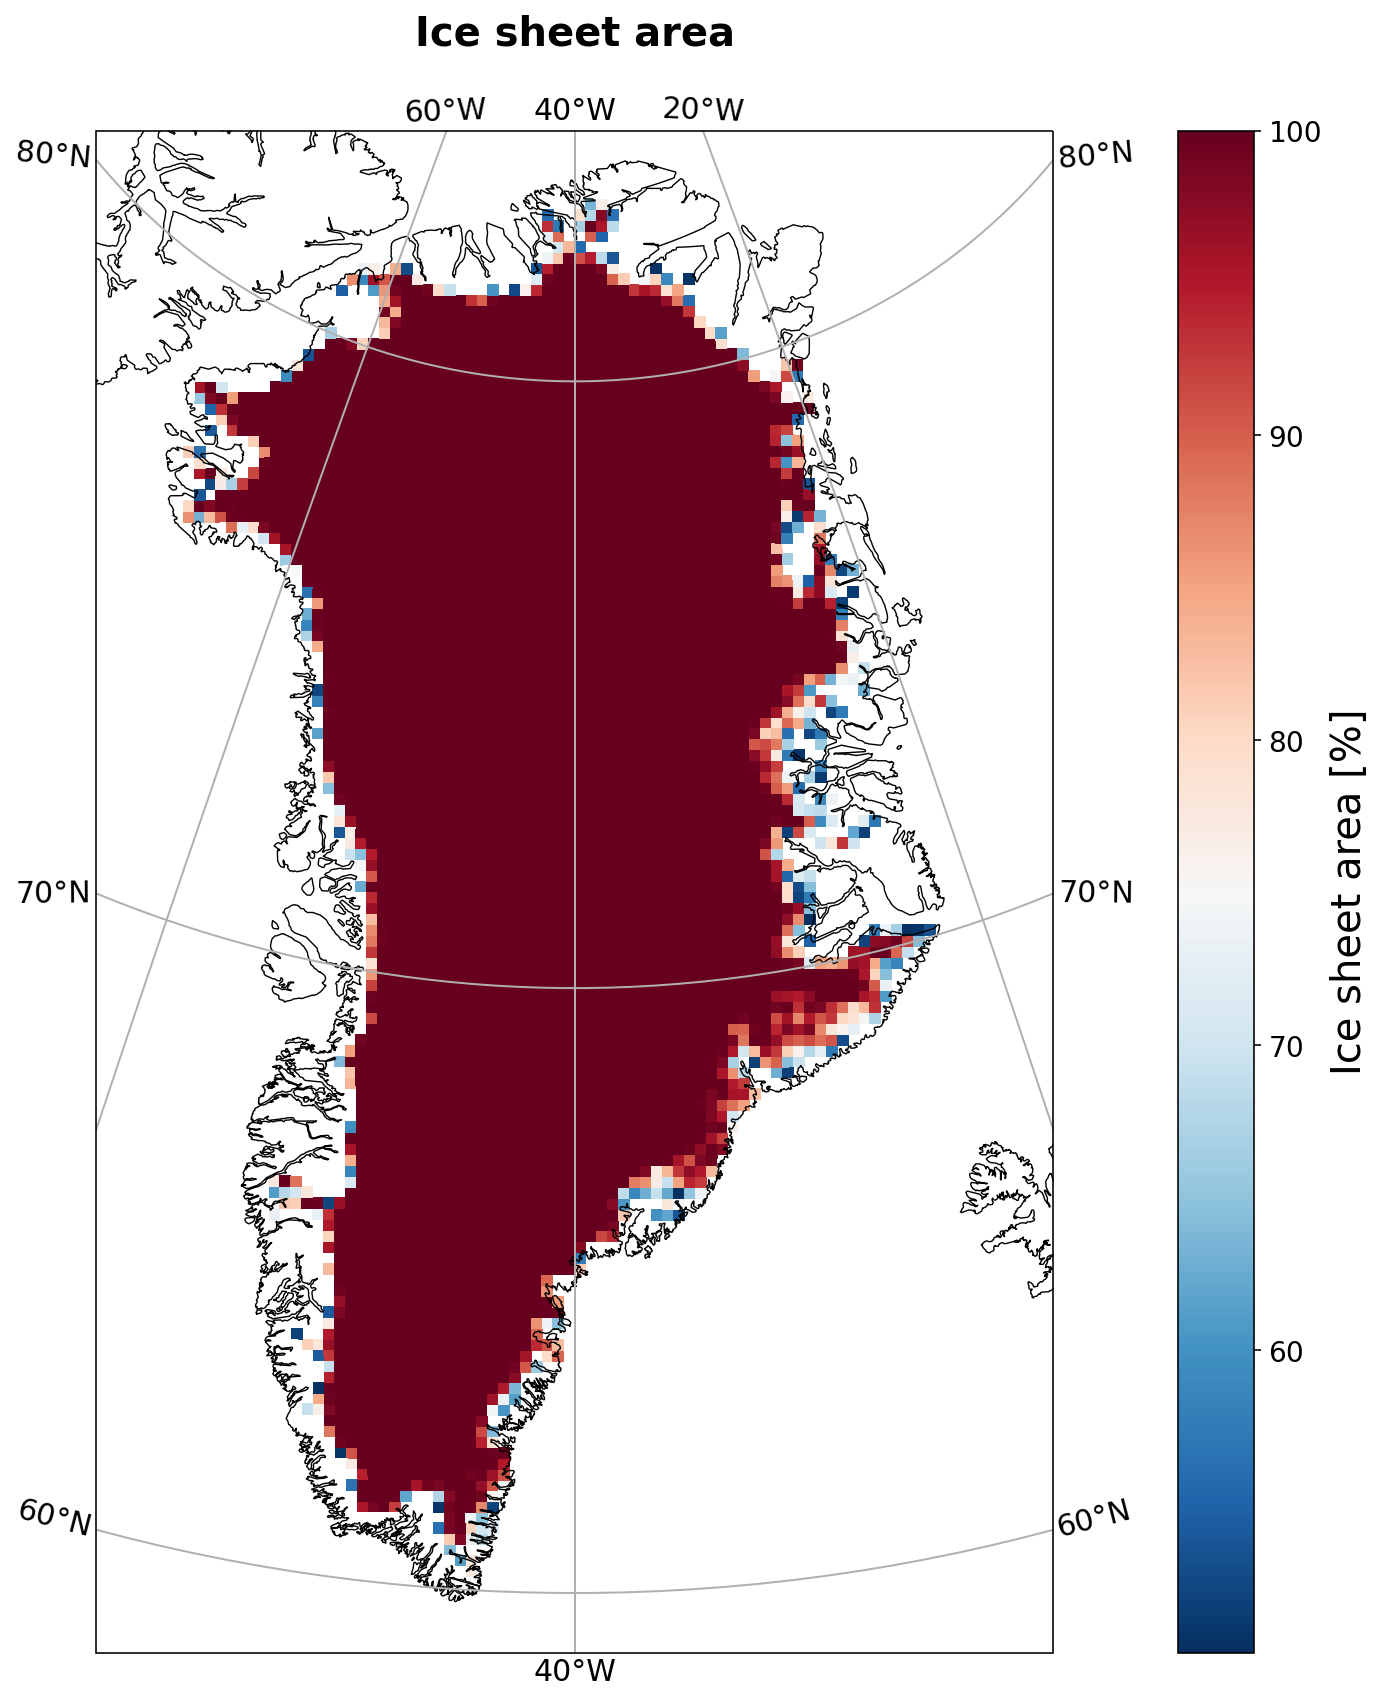

In [8]:
fig = plt.figure(figsize=(14,14))
ax = plt.axes(projection = ccrs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)
ax.coastlines(resolution = '10m', linewidth=0.7)
c = ax.pcolor(lon, lat, ds_MSK.MSK[0,:,:] * GrIS_label, transform=ccrs.PlateCarree(), cmap='RdBu_r')
cbar = fig.colorbar(c, ax=ax, pad = 0.08)
cbar.set_label('Ice sheet area [%]', fontsize=20)
cbar.ax.tick_params(labelsize=14)

gl = ax.gridlines(draw_labels=True, linewidth=1, alpha=1)
gl.xlocator = mticker.FixedLocator([-60, -40, -20])
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylocator = mticker.FixedLocator([60, 70, 80])
gl.ylabel_style = {'size': 15, 'color': 'black'}
plt.title('Ice sheet area', weight='bold', fontsize=20, pad=25);

#### Create array with ablation zone height threshold. Ablation zone is below 1624m

In [9]:
SH = ds_MSK.SH[0,:,:]
SH = np.where(SH > 1624, 0, SH)
SH = np.where(SH != 0, 1, SH)

#### Determine cells without snow and density between 920 and 925 kg/m3

In [10]:
SHSN2 = (ds_MSK.SHSN2[:,0,:,:] * GrIS_label)
SHSN2 = np.where(SHSN2 == 0, -1, SHSN2)
SHSN2 = np.where(SHSN2 > -1, 0, SHSN2)
SHSN2 = np.where(SHSN2 == -1, 1, SHSN2)
SHSN2_SH = SHSN2 * SH

In [11]:
RO1 = (ds_MSK.RO1[:,0,:,:] * GrIS_label)
RO1 = np.where(RO1 < 920, 0, RO1)
RO1 = np.where(RO1 > 925, 0, RO1)
RO1 = np.where(RO1 != 0, 1, RO1)
RO1_SH = RO1 * SH

In [12]:
s = SHSN2_SH * RO1_SH

#### Create time slices for each year

In [13]:
t2000 = np.arange(0,366); t2001 = np.arange(366,731); t2002 = np.arange(731,1096); t2003 = np.arange(1096,1461); t2004 = np.arange(1461,1827); t2005 = np.arange(1827,2192);
t2006 = np.arange(2192,2557) ; t2007 = np.arange(2557,2922); t2008 = np.arange(2922,3288); t2009 = np.arange(3288,3653); t2010 = np.arange(3653,4018)
yearlist = np.array([0,366,731,1096,1461,1827,2192,2557,2922,3288,3653,4018])

#### Determine annual maximum bare ice extent

In [14]:
bi = np.zeros((11,ds_MSK.MSK.shape[1], ds_MSK.MSK.shape[2]))
for year in range(11):
    bi[year,:,:] = np.nansum(s[np.arange(yearlist[year],yearlist[year+1]),:,:], axis=0)

#### Only includes cells that are determined as bare ice for at least 10 days per year. This omits any erraneous detections of supraglacial lakes as bare ice.

In [14]:
bi = np.where(bi < 10, 0, bi)

#### Turn 0's into NaN's for plotting

In [19]:
bi_plot = np.where(bi == 0, np.nan, bi)

#### Plot bare ice extent

/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


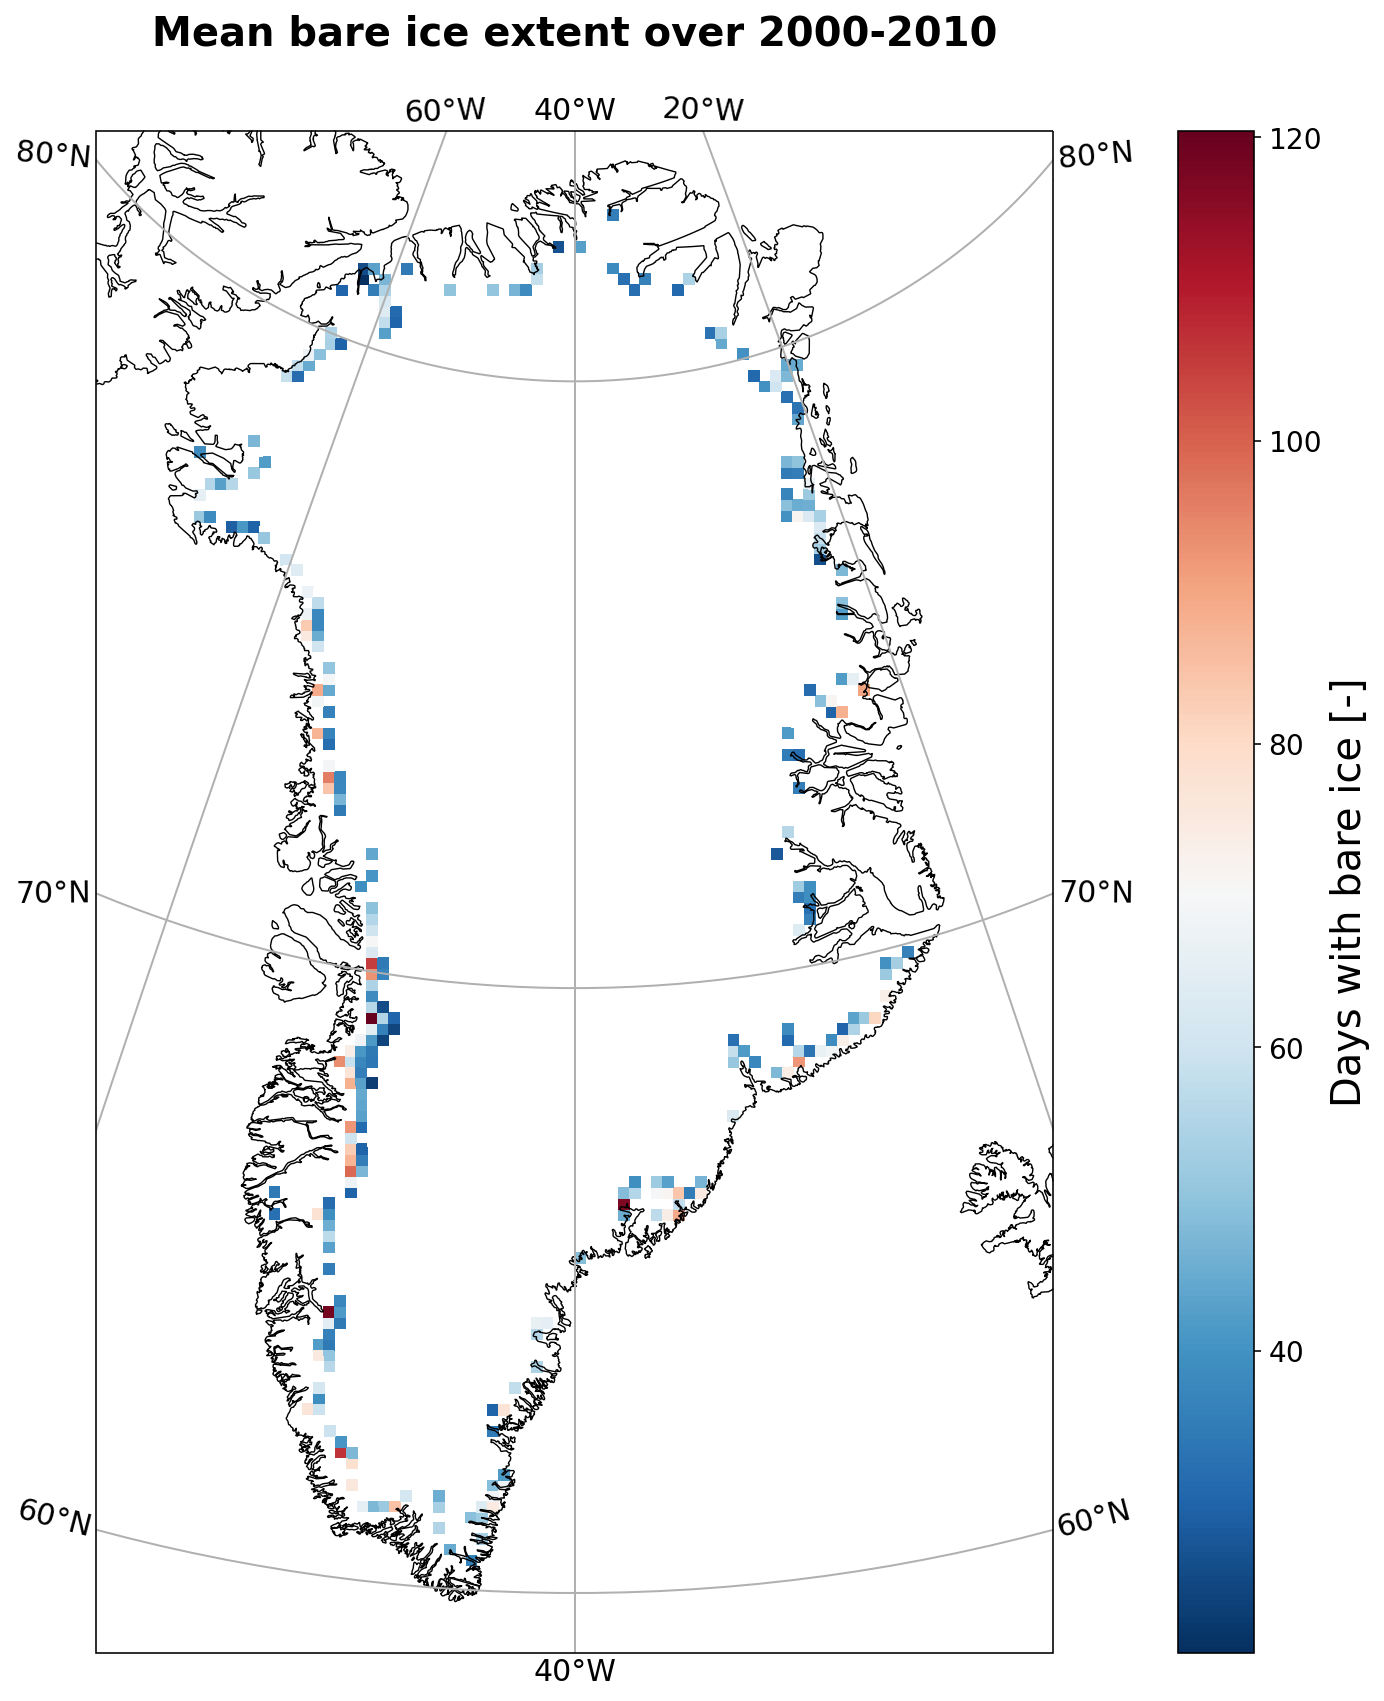

In [22]:
fig = plt.figure(figsize=(14,14))
ax = plt.axes(projection = ccrs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)
ax.coastlines(resolution = '10m', linewidth=0.7)
c = ax.pcolor(lon, lat, np.mean(bi_plot, axis=0), transform=ccrs.PlateCarree(), cmap='RdBu_r')
cbar = fig.colorbar(c, ax=ax, pad = 0.08)
cbar.set_label('Days with bare ice [-]', fontsize=20)
cbar.ax.tick_params(labelsize=14)

gl = ax.gridlines(draw_labels=True, linewidth=1, alpha=1)
gl.xlocator = mticker.FixedLocator([-60, -40, -20])
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylocator = mticker.FixedLocator([60, 70, 80])
gl.ylabel_style = {'size': 15, 'color': 'black'}
plt.title('Mean bare ice extent over 2000-2010', weight='bold', fontsize=20, pad=25);

#### Mean bare ice area over 2000-2010. All cells where bare ice has been exposed for more than 10 days per year.

In [23]:
bi_area = np.sum(bi, axis=0)
bi_area = np.where(bi_area > 0, 1, bi_area)
bi_area = np.where(bi_area == 0, np.nan, bi_area)

# Annual means

In [24]:
ds_CC_am = (ds_MSK.CC * GrIS_label).groupby('TIME.year').mean(dim=['TIME','Y21_155', 'X12_84'])
ds_CU_am = (ds_MSK.CU * GrIS_label).groupby('TIME.year').mean(dim=['TIME','Y21_155', 'X12_84'])
ds_CM_am = (ds_MSK.CM * GrIS_label).groupby('TIME.year').mean(dim=['TIME','Y21_155', 'X12_84'])
ds_CD_am = (ds_MSK.CD * GrIS_label).groupby('TIME.year').mean(dim=['TIME','Y21_155', 'X12_84'])

In [25]:
ds_CC_ambi = (ds_MSK.CC * GrIS_label * bi_area).groupby('TIME.year').mean(dim=['TIME','Y21_155', 'X12_84'])
ds_CU_ambi = (ds_MSK.CU * GrIS_label * bi_area).groupby('TIME.year').mean(dim=['TIME','Y21_155', 'X12_84'])
ds_CM_ambi = (ds_MSK.CM * GrIS_label * bi_area).groupby('TIME.year').mean(dim=['TIME','Y21_155', 'X12_84'])
ds_CD_ambi = (ds_MSK.CD * GrIS_label * bi_area).groupby('TIME.year').mean(dim=['TIME','Y21_155', 'X12_84'])

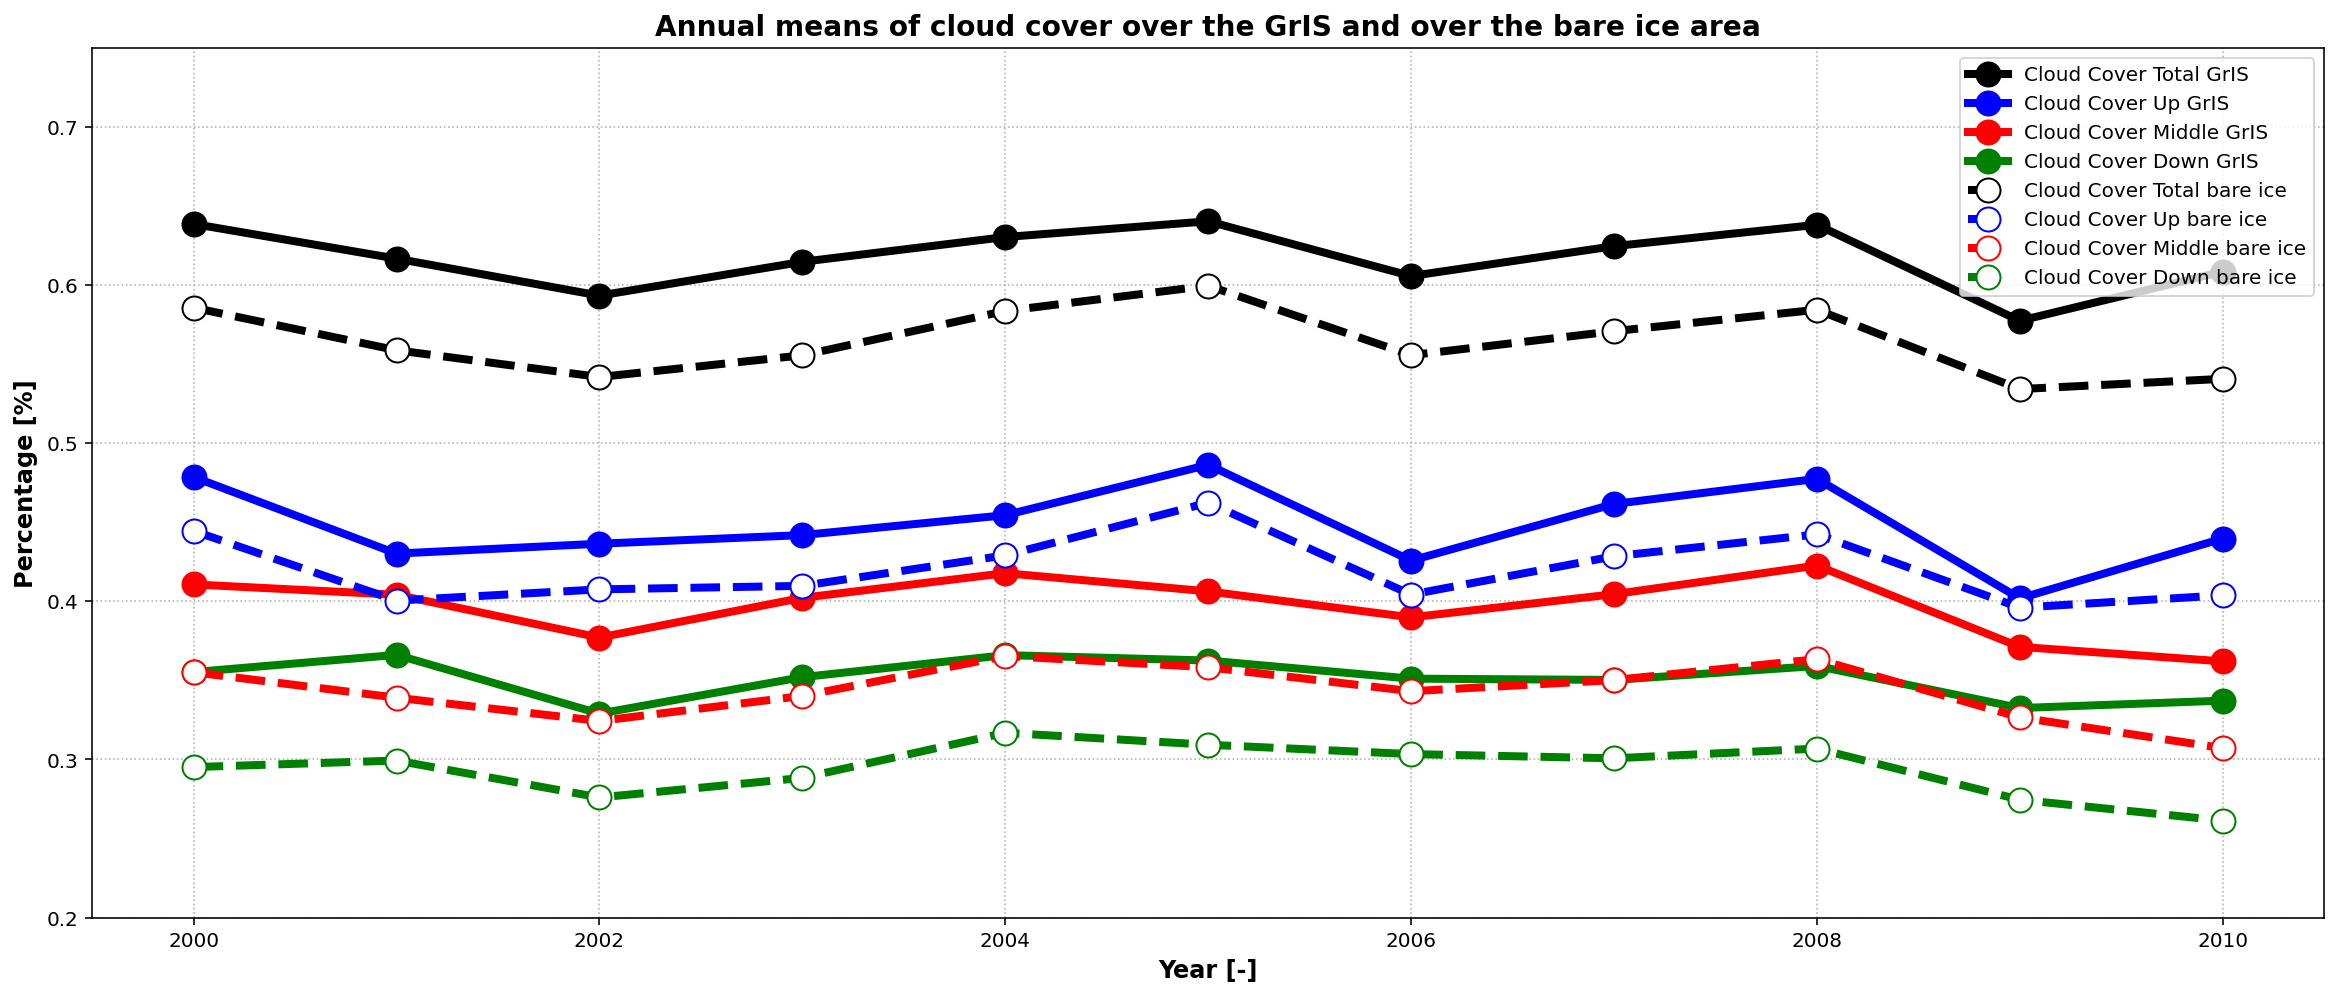

In [26]:
fig = plt.figure(figsize=(20,8))

plt.plot(np.arange(2000,2011), ds_CC_am, marker='o', markerfacecolor='black', markersize=12, color='black', linewidth=4, label='Cloud Cover Total GrIS')
plt.plot(np.arange(2000,2011), ds_CU_am, marker='o', markerfacecolor='blue', markersize=12, color='blue', linewidth=4, label='Cloud Cover Up GrIS')
plt.plot(np.arange(2000,2011), ds_CM_am, marker='o', markerfacecolor='red', markersize=12, color='red', linewidth=4, label='Cloud Cover Middle GrIS')
plt.plot(np.arange(2000,2011), ds_CD_am, marker='o', markerfacecolor='green', markersize=12, color='green', linewidth=4, label='Cloud Cover Down GrIS')

plt.plot(np.arange(2000,2011), ds_CC_ambi, marker='o', linestyle='--', markerfacecolor='white', markersize=12, color='black', linewidth=4, label='Cloud Cover Total bare ice')
plt.plot(np.arange(2000,2011), ds_CU_ambi, marker='o', linestyle='--', markerfacecolor='white', markersize=12, color='blue', linewidth=4, label='Cloud Cover Up bare ice')
plt.plot(np.arange(2000,2011), ds_CM_ambi, marker='o', linestyle='--', markerfacecolor='white', markersize=12, color='red', linewidth=4, label='Cloud Cover Middle bare ice')
plt.plot(np.arange(2000,2011), ds_CD_ambi, marker='o', linestyle='--', markerfacecolor='white', markersize=12, color='green', linewidth=4, label='Cloud Cover Down bare ice')

plt.xlim([1999.5, 2010.5])
plt.ylim([0.2, 0.75])
plt.xlabel('Year [-]', weight='bold', fontsize=12)
plt.ylabel('Percentage [%]', weight='bold', fontsize=12)
plt.title('Annual means of cloud cover over the GrIS and over the bare ice area', weight='bold', fontsize=14)
plt.legend(loc='upper right')
plt.grid(linestyle=':')

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice
/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gour

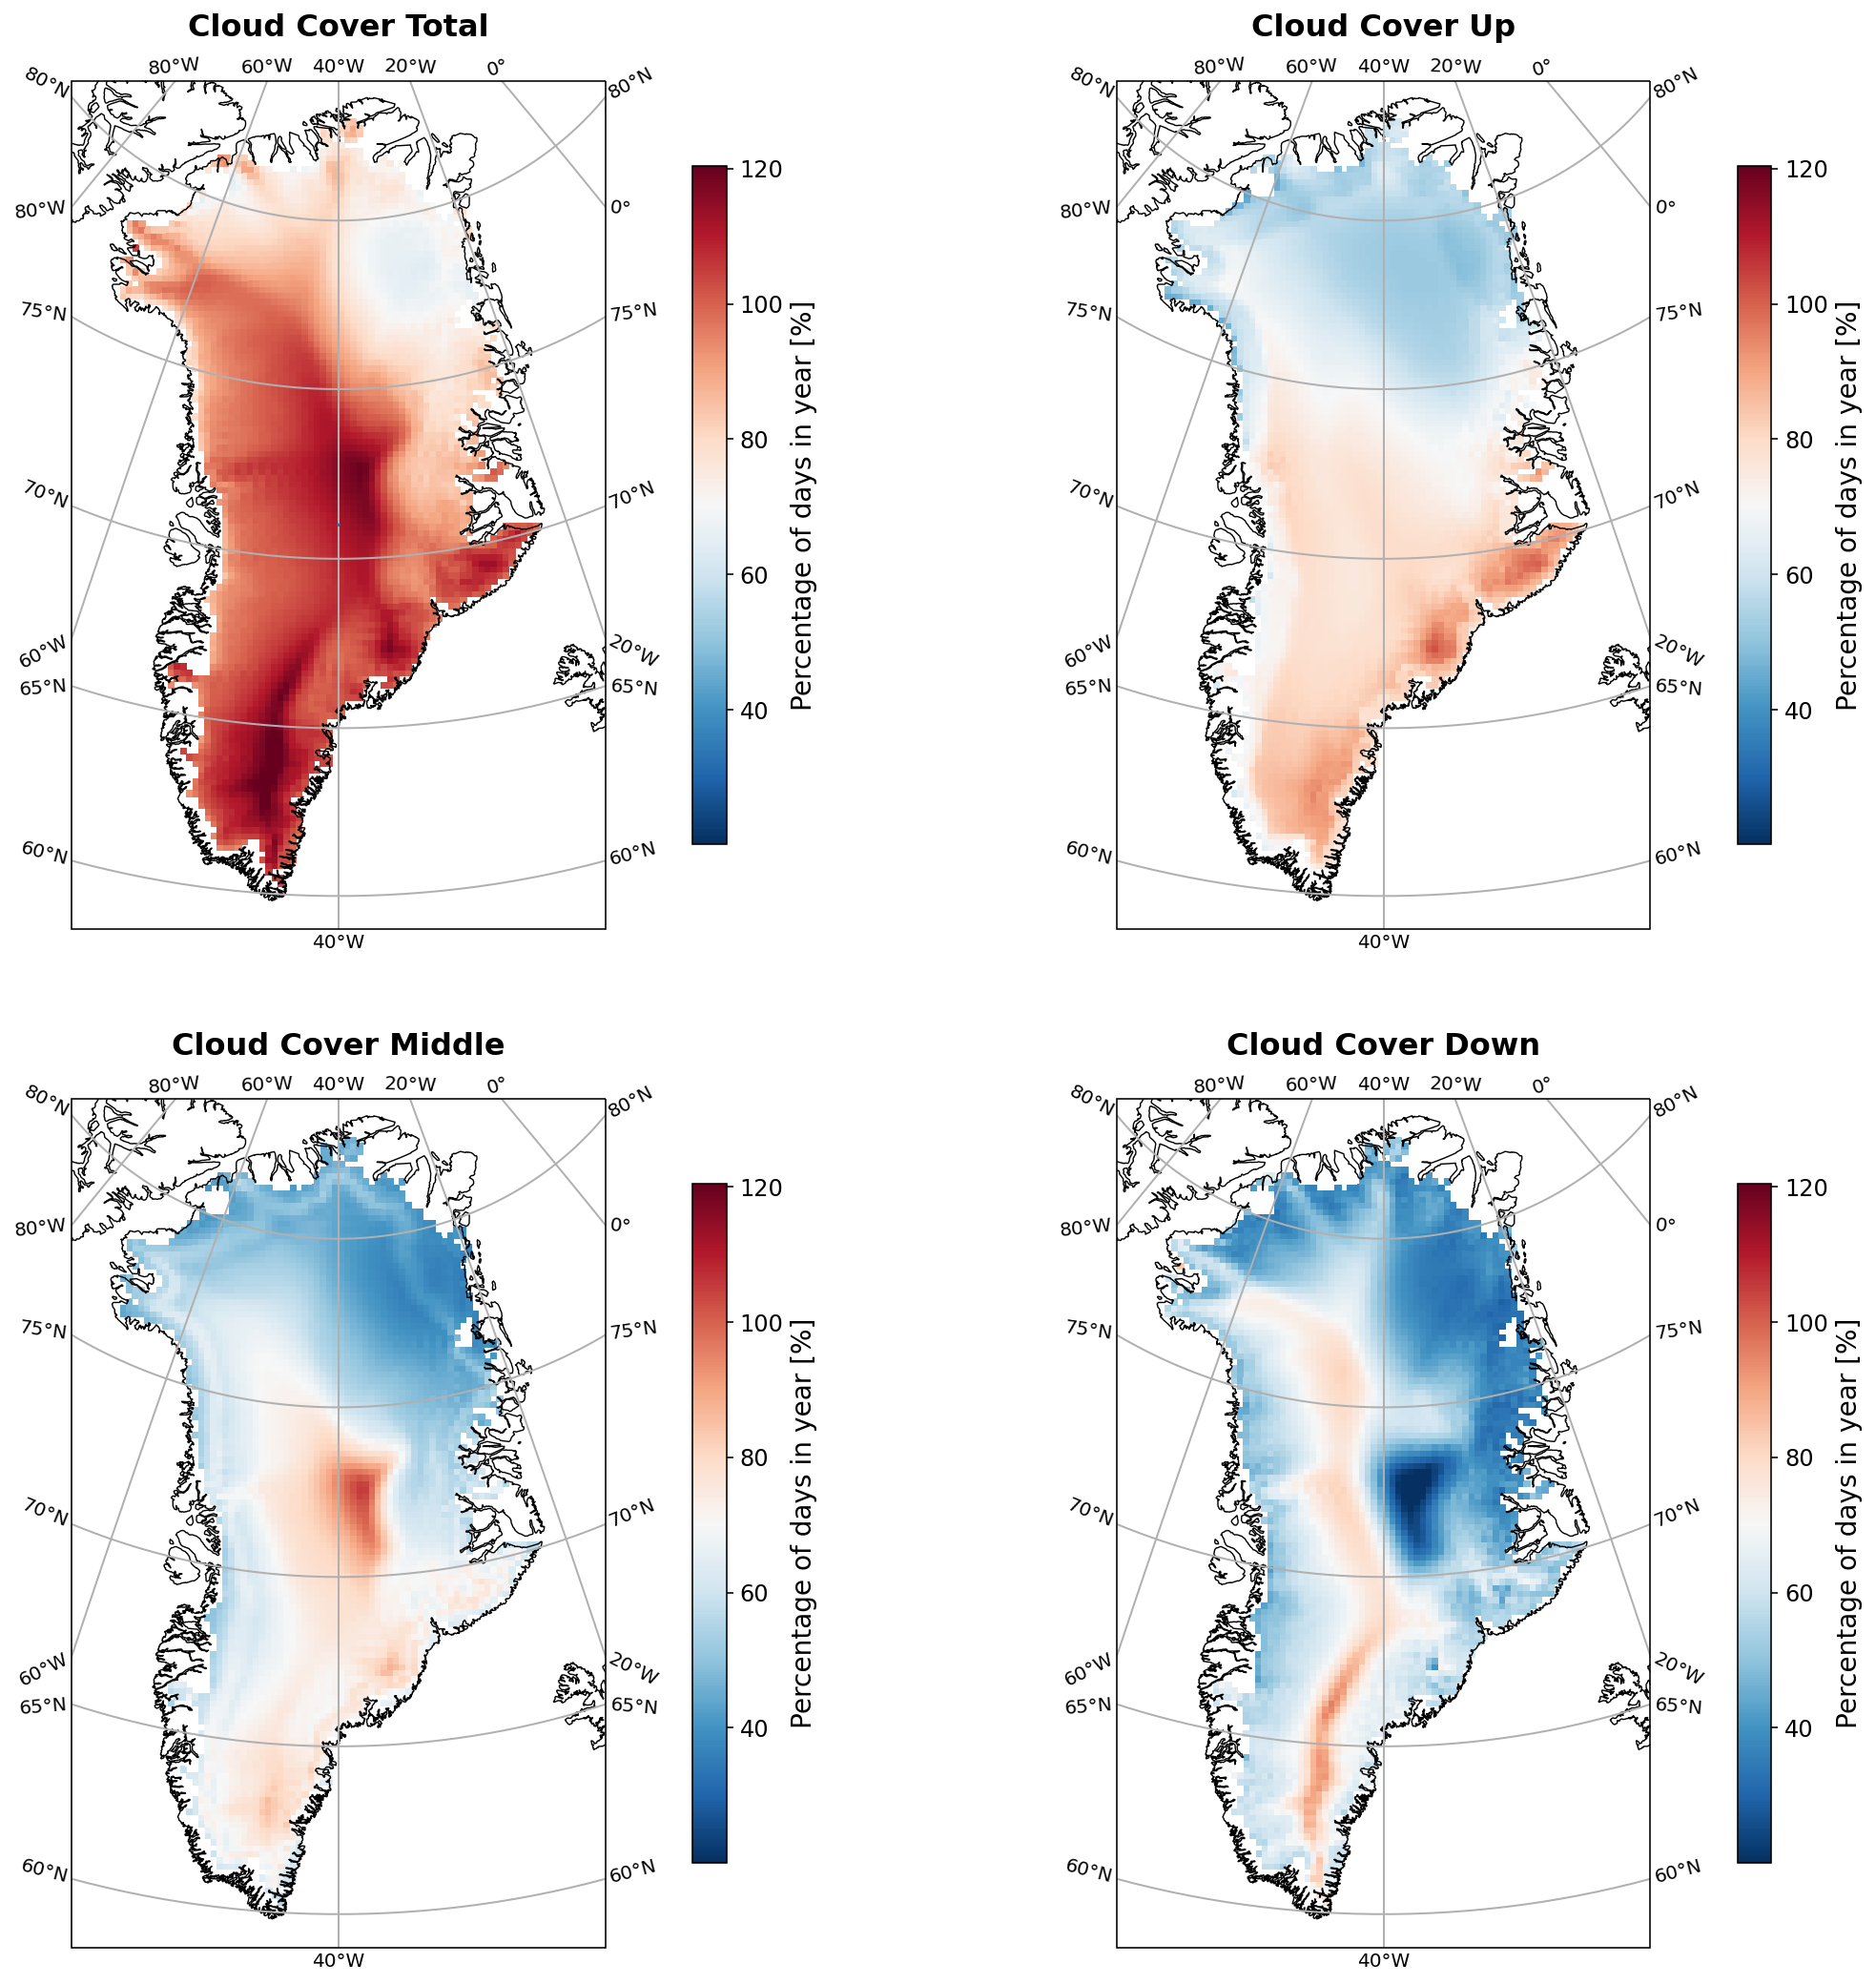

In [27]:
fig = plt.figure(figsize=(18,18))

ax0 = fig.add_subplot(221, projection = ccrs.Orthographic(central_lon, central_lat))
ax0.plot(np.random.rand(10))
ax0.set_extent(extent)
ax0.coastlines(resolution = '10m', linewidth=0.7)
ax0.pcolor(lon, lat, np.nanmean(ds_MSK.CC, axis=0) * GrIS_label, transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=0.1, vmax=0.8)
ax0.gridlines(draw_labels=True, linewidth=1, alpha=1)
ax0.xlocator = mticker.FixedLocator([-60, -40, -20])
ax0.xlabel_style = {'size': 15, 'color': 'black'}
ax0.ylocator = mticker.FixedLocator([60, 70, 80])
ax0.ylabel_style = {'size': 15, 'color': 'black'}
ax0.set_title('Cloud Cover Total', weight='bold', fontsize=16, pad=10);
cbar0 = fig.colorbar(c, ax=ax0, pad = 0.1, shrink=0.8)
cbar0.set_label('Percentage of days in year [%]', fontsize=14)
cbar0.ax.tick_params(labelsize=12)

ax1 = fig.add_subplot(222, projection = ccrs.Orthographic(central_lon, central_lat))
ax1.set_extent(extent)
ax1.coastlines(resolution = '10m', linewidth=0.7)
ax1.pcolor(lon, lat, np.nanmean(ds_MSK.CU, axis=0) * GrIS_label, transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=0.1, vmax=0.8)
ax1.gridlines(draw_labels=True, linewidth=1, alpha=1)
ax1.xlocator = mticker.FixedLocator([-60, -40, -20])
ax1.xlabel_style = {'size': 15, 'color': 'black'}
ax1.ylocator = mticker.FixedLocator([60, 70, 80])
ax1.ylabel_style = {'size': 15, 'color': 'black'}
ax1.set_title('Cloud Cover Up', weight='bold', fontsize=16, pad=10);
cbar1 = fig.colorbar(c, ax=ax1, pad = 0.1, shrink=0.8)
cbar1.set_label('Percentage of days in year [%]', fontsize=14)
cbar1.ax.tick_params(labelsize=12)

ax2 = fig.add_subplot(223, projection = ccrs.Orthographic(central_lon, central_lat))
ax2.set_extent(extent)
ax2.coastlines(resolution = '10m', linewidth=0.7)
ax2.pcolor(lon, lat, np.nanmean(ds_MSK.CM, axis=0) * GrIS_label, transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=0.1, vmax=0.8)
ax2.gridlines(draw_labels=True, linewidth=1, alpha=1)
ax2.xlocator = mticker.FixedLocator([-60, -40, -20])
ax2.xlabel_style = {'size': 15, 'color': 'black'}
ax2.ylocator = mticker.FixedLocator([60, 70, 80])
ax2.ylabel_style = {'size': 15, 'color': 'black'}
ax2.set_title('Cloud Cover Middle', weight='bold', fontsize=16, pad=10);
cbar2 = fig.colorbar(c, ax=ax2, pad = 0.1, shrink=0.8)
cbar2.set_label('Percentage of days in year [%]', fontsize=14)
cbar2.ax.tick_params(labelsize=12)

ax3 = fig.add_subplot(224, projection = ccrs.Orthographic(central_lon, central_lat))
ax3.set_extent(extent)
ax3.coastlines(resolution = '10m', linewidth=0.7)
ax3.pcolor(lon, lat, np.nanmean(ds_MSK.CD, axis=0) * GrIS_label, transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=0.1, vmax=0.8)
ax3.gridlines(draw_labels=True, linewidth=1, alpha=1)
ax3.xlocator = mticker.FixedLocator([-60, -40, -20])
ax3.xlabel_style = {'size': 15, 'color': 'black'}
ax3.ylocator = mticker.FixedLocator([60, 70, 80])
ax3.ylabel_style = {'size': 15, 'color': 'black'}
ax3.set_title('Cloud Cover Down', weight='bold', fontsize=16, pad=10);
cbar3 = fig.colorbar(c, ax=ax3, pad = 0.1, shrink=0.8)
cbar3.set_label('Percentage of days in year [%]', fontsize=14)
cbar3.ax.tick_params(labelsize=12)

In [ ]:
# Seasonal cloud cover of GrIS and over bare ice area, averaged over all years

In [28]:
ds_MSK.CC.groupby('TIME.day').mean(dim=['TIME','Y21_155', 'X12_84']).hvplot()


:Curve   [day]   (CC)

In [ ]:
ds_MSK.TIME.groupby('TIME.day')